# Assignment: Predicting House Price
## Multiple Linear Regression

### Objectives
#### - To identify features that affects house prices (area, number of rooms, bathrooms, etc.)
#### - To create a linear model that quantitatively relates house prices with other features (number of rooms, area, number of bathrooms, etc).
#### - To develop and train a predictive model for house prices; know the accuracy of the medel and how well these features can predict house prices.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isnull().sum()*100/df.shape[0]


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
import seaborn as sns

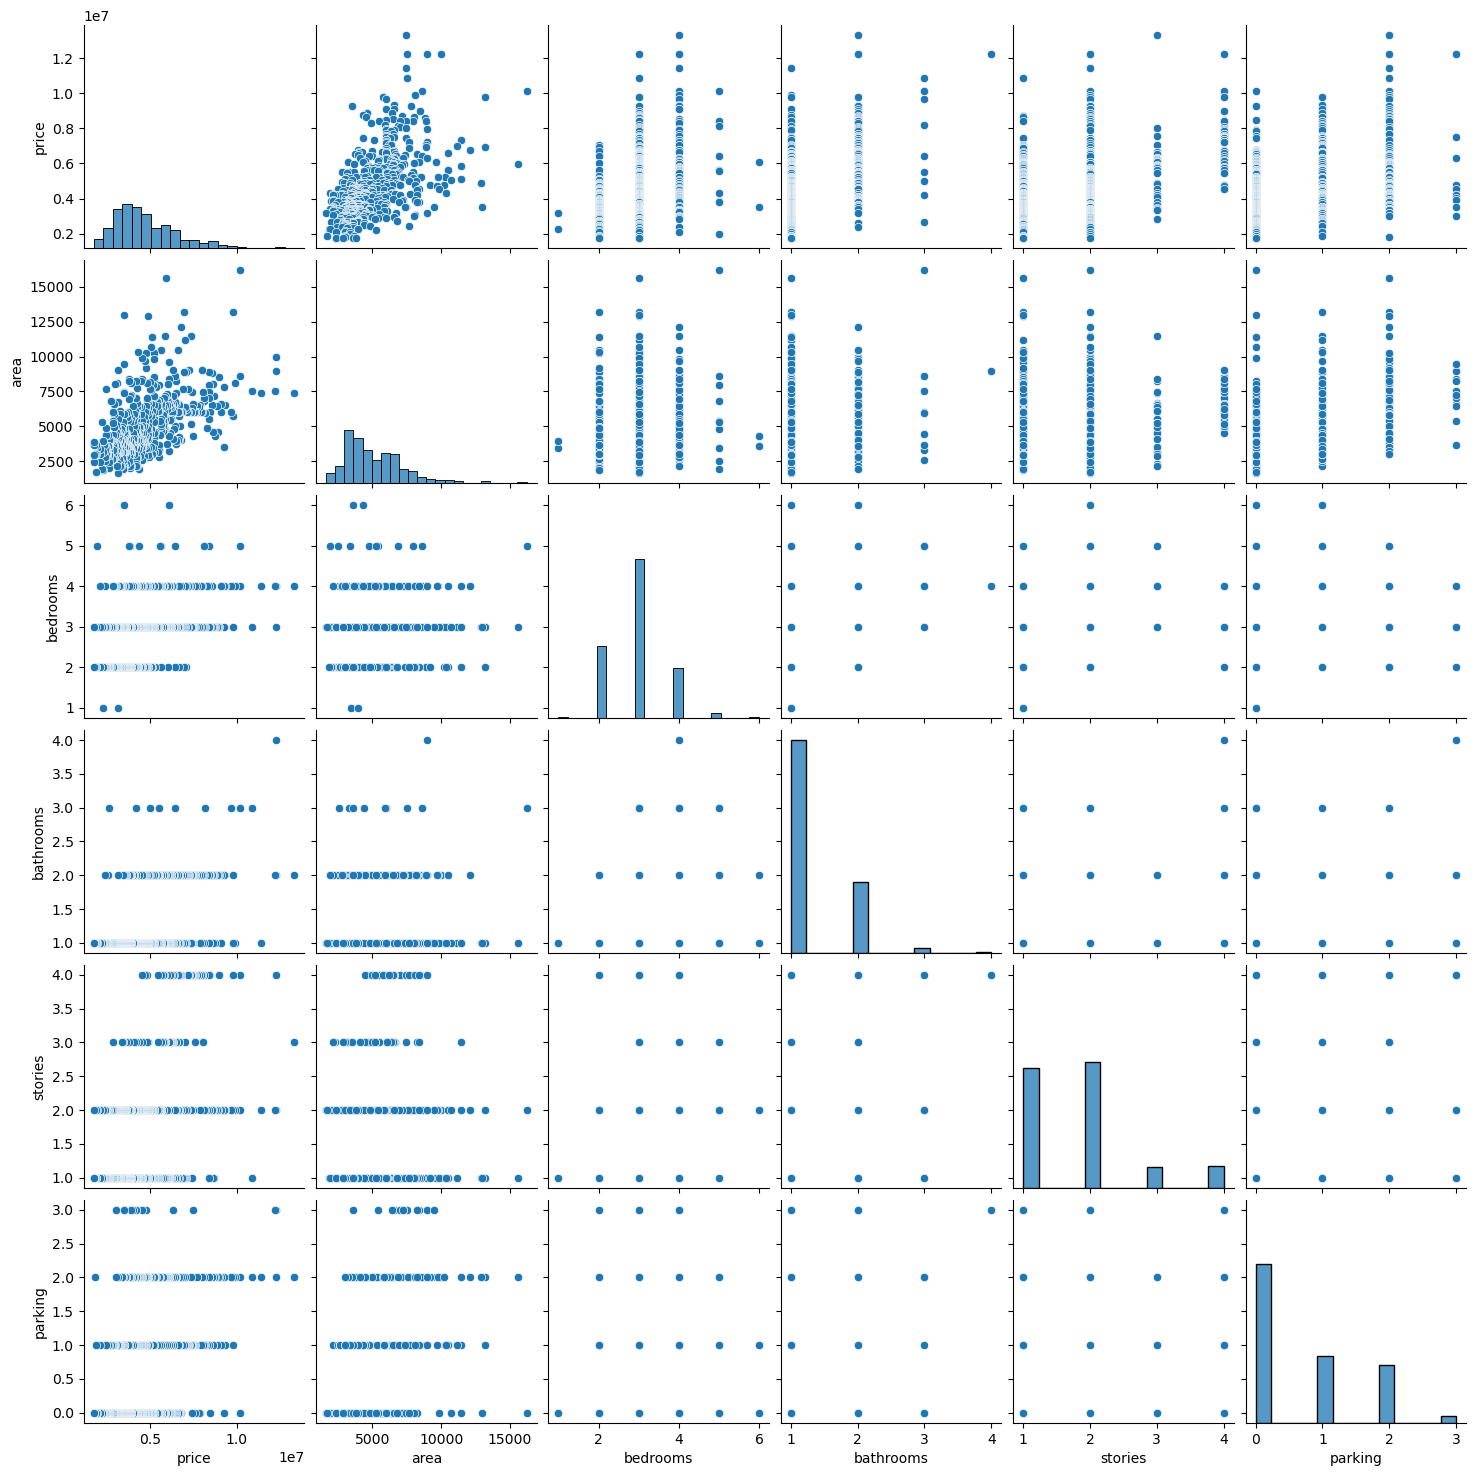

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Convert string features to numerical feature to enable regression line fitting**

In [14]:
feature1 =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',]
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
df[feature1] = df[feature1].apply(binary_map)

In [15]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished


In [16]:
df = df.drop(['prefarea', 'furnishingstatus'], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3
2,12250000,9960,3,2,2,1,0,1,0,0,2
3,12215000,7500,4,2,2,1,0,1,0,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2


In [17]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173


In [18]:
import matplotlib.pyplot as plt

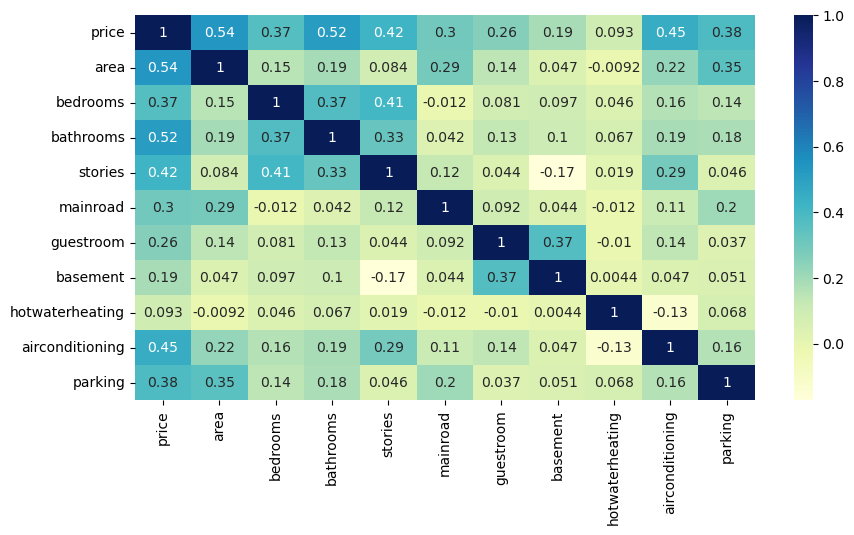

In [19]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [20]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories','mainroad','parking']] #features
y = df [['price']] # targets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred[:6]

array([[3106977.43805243],
       [3411041.59683619],
       [7728933.65213463],
       [5556414.16400344],
       [4891715.80837906],
       [4331324.76595261]])

**Evaluating the Model**

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)

print(f"R square is {accuracy}")
print(f"MSE is {mse}")

R square is 0.6239934792929918
MSE is 1231824261828.7847


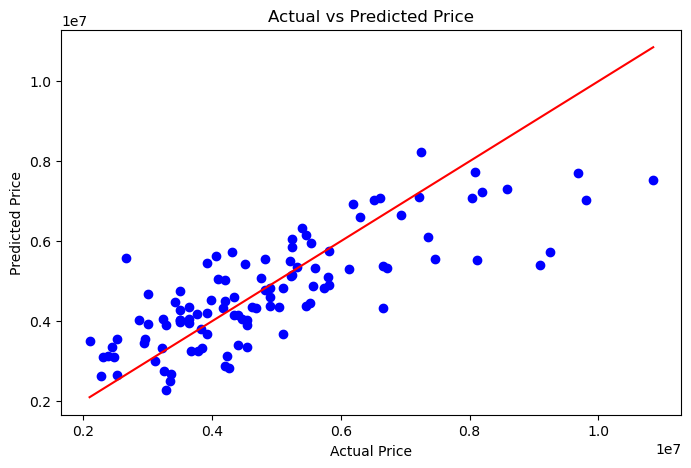

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3
2,12250000,9960,3,2,2,1,0,1,0,0,2
3,12215000,7500,4,2,2,1,0,1,0,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2


In [79]:
X2 = df[['area','bathrooms', 'stories','airconditioning']] #features
y = df [['price']] # targets

In [81]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size = 0.8, random_state = 123)


In [83]:
model2 = LinearRegression()
model2.fit(X2_train, y_train)

LinearRegression()

In [85]:
y_pred2 = model2.predict(X2_test)
y_pred2[:5]

array([[3033037.83476823],
       [3725991.54461205],
       [7886212.27382796],
       [4983090.56164772],
       [4999090.94875955]])

In [87]:
accuracy2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error (y_test, y_pred2)

print(f"R square is {accuracy2}")
print(f"MSE is {mse2}")

R square is 0.5100232381417376
MSE is 1605198925418.696


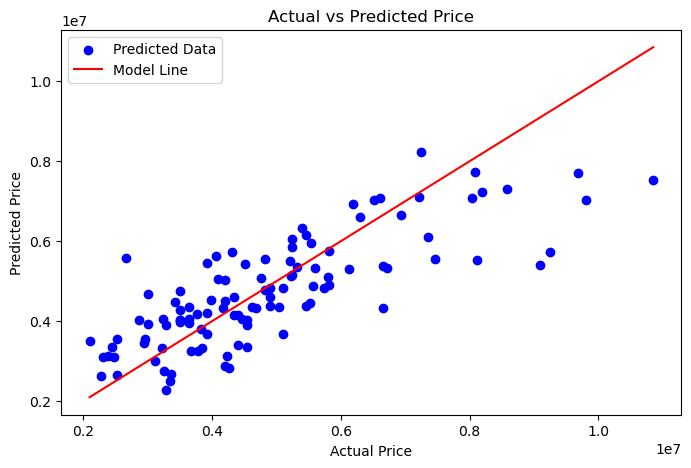

In [89]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', label="Predicted Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Model Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.show()

**BY ADJAH EKWANG ADJAH**